# __Yelp API Tutorial__

## __Agenda:__

1. Registering for Yelp Developers
2. Yelp Business Search API Example
3. Yelp Business Review API Example

## __1. Registering for Yelp Developers__

1. Register here at https://www.yelp.com/developers.
2. Create an app.
3. Take note of your Client ID and API Key.

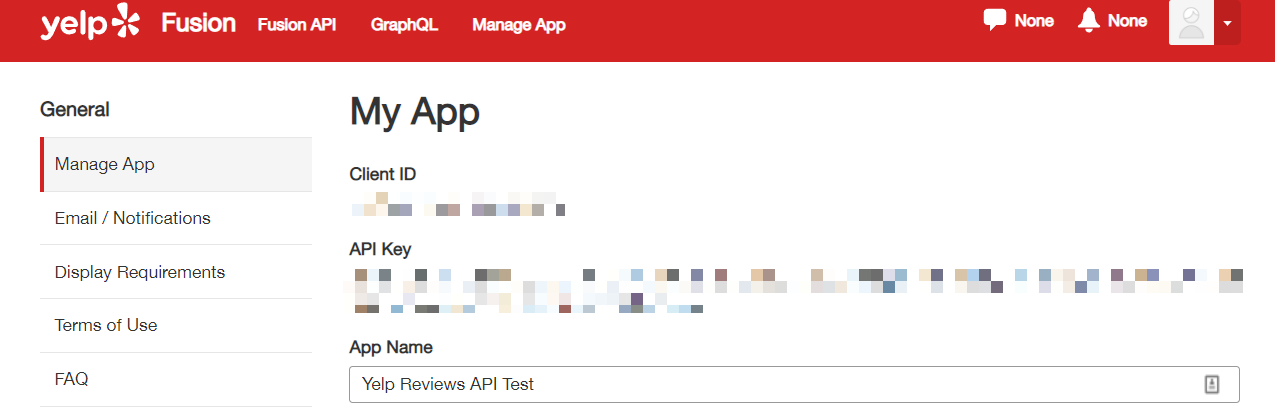

4. Check out the different API requests you can make. For instance, https://www.yelp.com/developers/documentation/v3/business_search.

## __2. Yelp Business Search API Example__

1. You can see the parameters you can set for Business Search here: https://www.yelp.com/developers/documentation/v3/business_search.

In [1]:
# Import libraries

import requests

In [2]:
# Business Search API

url = 'https://api.yelp.com/v3/businesses/search'
api_key = '{I REMOVED MY API KEY, PLEASE INPUT YOUR API KEY HERE}' # Keep your API key secret!
headers = {
    'Authorization': 'Bearer %s' % api_key
}

In [3]:
# Search parameters

parameters = {
    'location': 'Orchard Road Singapore',
    'term': 'Mall',
    'radius': 5000,
    'limit': 10
}

In [4]:
# Run your business search with Yelp

response = requests.get(url, headers=headers, params=parameters)
response # Response code 200 means your API call is successful

<Response [200]>

In [5]:
# See the actual data, which was returned in .json format, from the API call

response.json()

{'businesses': [{'id': 'AuMusFkjT3RvfzmXy4cEZw',
   'alias': 'ion-orchard-singapore',
   'name': 'ION Orchard',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/W7HN6BV6_eWZ8Qe7lOA9hA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/ion-orchard-singapore?adjust_creative=BBBtblTGVVNrjXLYWWPJPg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=BBBtblTGVVNrjXLYWWPJPg',
   'review_count': 68,
   'categories': [{'alias': 'shoppingcenters', 'title': 'Shopping Centers'}],
   'rating': 4.0,
   'coordinates': {'latitude': 1.3040799, 'longitude': 103.83181},
   'transactions': [],
   'price': '$$$$',
   'location': {'address1': '2 Orchard Turn',
    'address2': None,
    'address3': None,
    'city': 'Singapore',
    'zip_code': '238801',
    'country': 'SG',
    'state': 'SG',
    'display_address': ['2 Orchard Turn', 'Singapore 238801', 'Singapore']},
   'phone': '+6562388228',
   'display_phone': '+65 6238 8228',
   'distance': 104.01909274203395}

In [6]:
# Return a specific key from your .json data

query = response.json()['businesses']
for q in query:
    print(f'Mall: {q["name"]},\nBusiness ID: {q["id"]},\nRating: {q["rating"]},\nPrice Rating: {q["price"]},\nReviews: {q["review_count"]}.\n')

Mall: ION Orchard,
Business ID: AuMusFkjT3RvfzmXy4cEZw,
Rating: 4.0,
Price Rating: $$$$,
Reviews: 68.

Mall: Novena Square,
Business ID: AenJ48QfLbzx-PvqDZFGvg,
Rating: 4.0,
Price Rating: $$,
Reviews: 1.

Mall: Great World City,
Business ID: SRxLBf2yD9I-8ecstBlKUw,
Rating: 3.5,
Price Rating: $$,
Reviews: 19.

Mall: Clarke Quay,
Business ID: -oJYHvx0eGGxVAa6qtos3Q,
Rating: 4.0,
Price Rating: $$,
Reviews: 63.

Mall: Scotts Square,
Business ID: ggb_iT4SMLxyDJiQQKSIGw,
Rating: 4.0,
Price Rating: $$$,
Reviews: 4.

Mall: Velocity Novena,
Business ID: ZBRsYDF1Qc9nzD8n1_ti1g,
Rating: 4.0,
Price Rating: $$,
Reviews: 6.

Mall: 100AM,
Business ID: Uq2Iy58XpIhmMpGidLuxbQ,
Rating: 4.5,
Price Rating: $$,
Reviews: 3.

Mall: Orchard Road,
Business ID: f9NRCzvRMWJEVoYt0w0M9Q,
Rating: 4.0,
Price Rating: $$$,
Reviews: 42.

Mall: Takashimaya,
Business ID: yYgMEmYZgPOl7T3y_-tm3g,
Rating: 4.0,
Price Rating: $$$,
Reviews: 32.

Mall: Queensway Shopping Centre,
Business ID: Gk4SClFmXmwUn3-p1g1plQ,
Rating: 4.0,

In [7]:
# Store data in a dataframe

import pandas as pd

results = {'Name': [], 'Business ID': [],'Rating': [], 'Price Rating': [], 'No. of Reviews': []}
for q in query:
    results['Name'].append(q['name'])
    results['Business ID'].append(q['id'])
    results['Rating'].append(q['rating'])
    results['Price Rating'].append(len(q['price']))
    results['No. of Reviews'].append(q['review_count'])
    
results_df = pd.DataFrame(results)
results_df

,Name,Business ID,Rating,Price Rating,No. of Reviews
0,ION Orchard,AuMusFkjT3RvfzmXy4cEZw,4.0,4,68
1,Novena Square,AenJ48QfLbzx-PvqDZFGvg,4.0,2,1
2,Great World City,SRxLBf2yD9I-8ecstBlKUw,3.5,2,19
3,Clarke Quay,-oJYHvx0eGGxVAa6qtos3Q,4.0,2,63
4,Scotts Square,ggb_iT4SMLxyDJiQQKSIGw,4.0,3,4
5,Velocity Novena,ZBRsYDF1Qc9nzD8n1_ti1g,4.0,2,6
6,100AM,Uq2Iy58XpIhmMpGidLuxbQ,4.5,2,3
7,Orchard Road,f9NRCzvRMWJEVoYt0w0M9Q,4.0,3,42
8,Takashimaya,yYgMEmYZgPOl7T3y_-tm3g,4.0,3,32
9,Queensway Shopping Centre,Gk4SClFmXmwUn3-p1g1plQ,4.0,2,14


## __3. Yelp Business Review API Example__

1. Parameters from: https://www.yelp.com/developers/documentation/v3/business_reviews.
2. Business IDs can be obtained from the Business Search API from Yelp or from other Yelp APIs.

In [8]:
url = 'https://api.yelp.com/v3/businesses/{id}/reviews'
api_key = '{I REMOVED MY API KEY, PLEASE INPUT YOUR API KEY HERE}' # Keep your API key secret!
headers = {
    'Authorization': 'Bearer %s' % api_key
}

In [9]:
# Run business reviews api

business_reviews = []

for biz_id in results_df['Business ID'].values:
    url = f'https://api.yelp.com/v3/businesses/{biz_id}/reviews'
    response = requests.get(url, headers=headers)
    business_reviews.append(response.json())
    print(response)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [10]:
# Check the business review text

business_reviews[0]['reviews'][0]['text']

"High end shopping mall that offers a little something for everyone. Best not to look at the price of anything because 1) you're in Singapore. So expect to..."

### The End.
### Thank You!